# Regresión Lineal

## Librerías

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

sns.set_style(style="whitegrid")

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.append("..")

import modules.utils.paths as path

## Descarga del Dataset

In [4]:
housing_data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
housing_data_file = path.data_raw_dir("housing.csv")

In [5]:
!curl {housing_data_url} -o {housing_data_file}

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 49082    0 49082    0     0   315k      0 --:--:-- --:--:-- --:--:--  317k


In [6]:
housing_df = pd.read_csv(housing_data_file, header=None, sep="\s+")
housing_df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
housing_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## Entendiendo los datos

### Descripción de las variables

1. `CRIM`:     Taza de criminalidad en la zona.
2. `ZN`:       Proporción de terreno recidencial para lotes mayores a 25k pies cuadrados
3. `INDUS`:    Proporción de industrias por ciudad
4. `CHAS`:     Variable dummy del río Charles (= 1 colimnda con el río; 0 lo contrario)
5. `NOX`:      Concentración de óxido nítrico (partes por 10 millones)
6. `RM`:       Promedio de habitaciones por vivienda
7. `AGE`:      Proporcion de unidades ocupadas por sus propietarios construidas antes de 1940
8. `DIS`:      Distancia ponderada a 5 centros de empleo de Boston
9. `RAD`:      Indice de accecibilidad a carreteras radiales
10. `TAX`:     Tasa de impuesto a la propiedad sobre el valor total por cada $10,000
11. `PTRATIO`: Relación alumno-profesor por ciudad
12. `B`:       1000(Bk - 0.63)^2 Bk es la proporción de personas de color por ciudad
13. `LSTAT`:   % Estatus inferior de la población
14. `MEDV`:    Valor medio de las viviendas ocupadas por sus propietarios en $1,000's

Buscamos si existe alguna correlación entre las variables y la variable objetivo (`MEDV`).

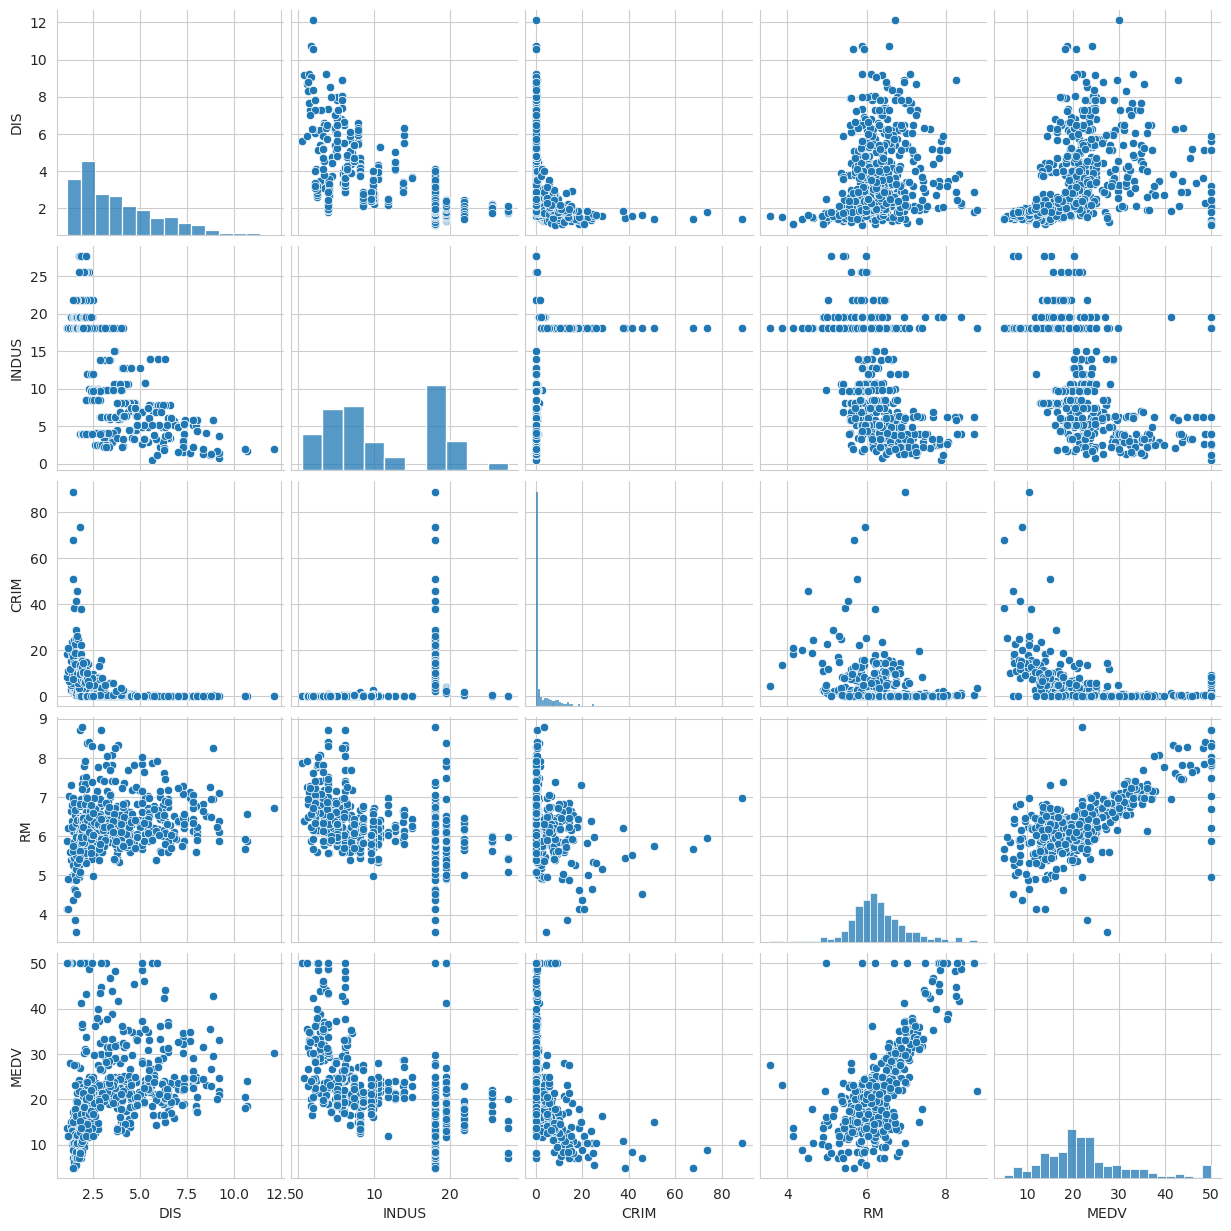

In [7]:
cols = ["DIS", "INDUS", "CRIM", "RM", "MEDV"]
sns.pairplot(housing_df[cols], height=2.5)
plt.show()

Corroboramos las correlaciones mediante la matríz de coeficientes de correlación.

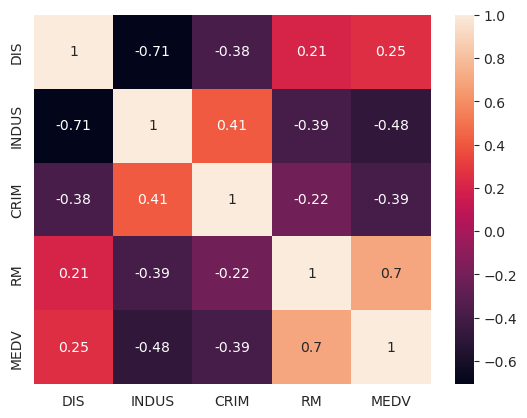

In [8]:
cm = np.corrcoef(housing_df[cols].values.T)
sns.heatmap(cm,
  cbar=True,
  annot=True,
  yticklabels=cols,
  xticklabels=cols
)
plt.show()

Variables mejor correlacionadas con `MEDV`:
- `RM`: Alta correlación positiva, a mayor número de habitaciones mayor es la mediana del precio de las viviendas.
- `INDUS`: Baja correlación negativa, menor cantidad de industrias en la zona, menor es la mediana del precio de las viviendas.

## Entrenando el modelo

In [9]:
# Variables objetivo y predictora
x = housing_df["RM"].values.reshape(-1, 1)
y = housing_df["MEDV"].values.reshape(-1, 1)

# Estandatizamos los datos
x_scaler = StandardScaler()
y_scaler = StandardScaler()

X_std = x_scaler.fit_transform(x)
Y_std = y_scaler.fit_transform(y)

# Creamos el modelo
slr = LinearRegression()

slr.fit(X_std, Y_std)

LinearRegression()

## Análisis de resultados

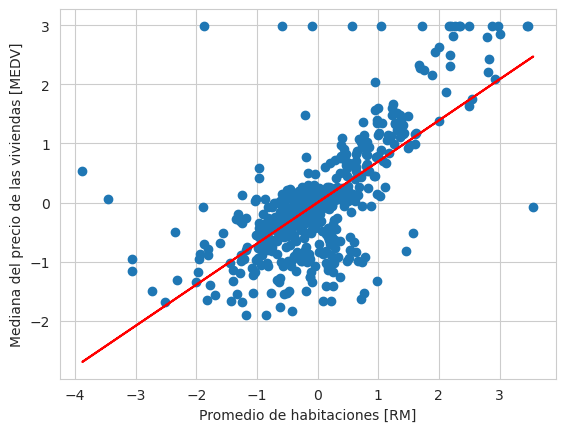

In [10]:
plt.scatter(X_std, Y_std)
plt.plot(X_std, slr.predict(X_std), color="r")
plt.xlabel("Promedio de habitaciones [RM]")
plt.ylabel("Mediana del precio de las viviendas [MEDV]")
plt.show()

## Generando predicciones con el modelo

In [11]:
rooms = 5
rooms_std = x_scaler.fit_transform(np.array([rooms]).reshape(-1, 1))

predict = y_scaler.inverse_transform(slr.predict(rooms_std))
print(f"El precio de una casa de {rooms} habitaciones en Boston es de {predict}")

El precio de una casa de 5 habitaciones en Boston es de [[22.53280632]]


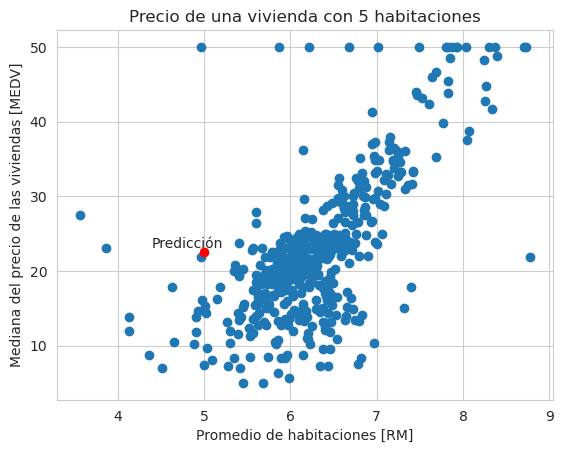

In [12]:
plt.scatter(
  housing_df["RM"],
  housing_df["MEDV"]
)

plt.plot(rooms, predict, "ro")

plt.annotate(
  "Predicción",
  xy=(rooms-.6, predict+.6)
)

plt.title("Precio de una vivienda con 5 habitaciones")
plt.xlabel("Promedio de habitaciones [RM]")
plt.ylabel("Mediana del precio de las viviendas [MEDV]")
plt.show()